In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)


In [ ]:
pd.set_option('display.max_rows',100000)
pd.set_option('display.max_columns',1000)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
data = pd.read_excel('Concrete_Data.xls')

In [ ]:
data.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
len(data)


1030

In [ ]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer","CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]

curr_col_names = list(data.columns)

mapper = {}
for i,name in enumerate(curr_col_names):
  mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)


In [ ]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
data.shape

(1030, 9)

In [ ]:
data.isnull().sum()

,0
Cement,0
BlastFurnaceSlag,0
FlyAsh,0
Water,0
Superplasticizer,0
CoarseAggregate,0
FineAggregate,0
Age,0
CC_Strength,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CC_Strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
BlastFurnaceSlag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
FlyAsh,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
CoarseAggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
FineAggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
CC_Strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


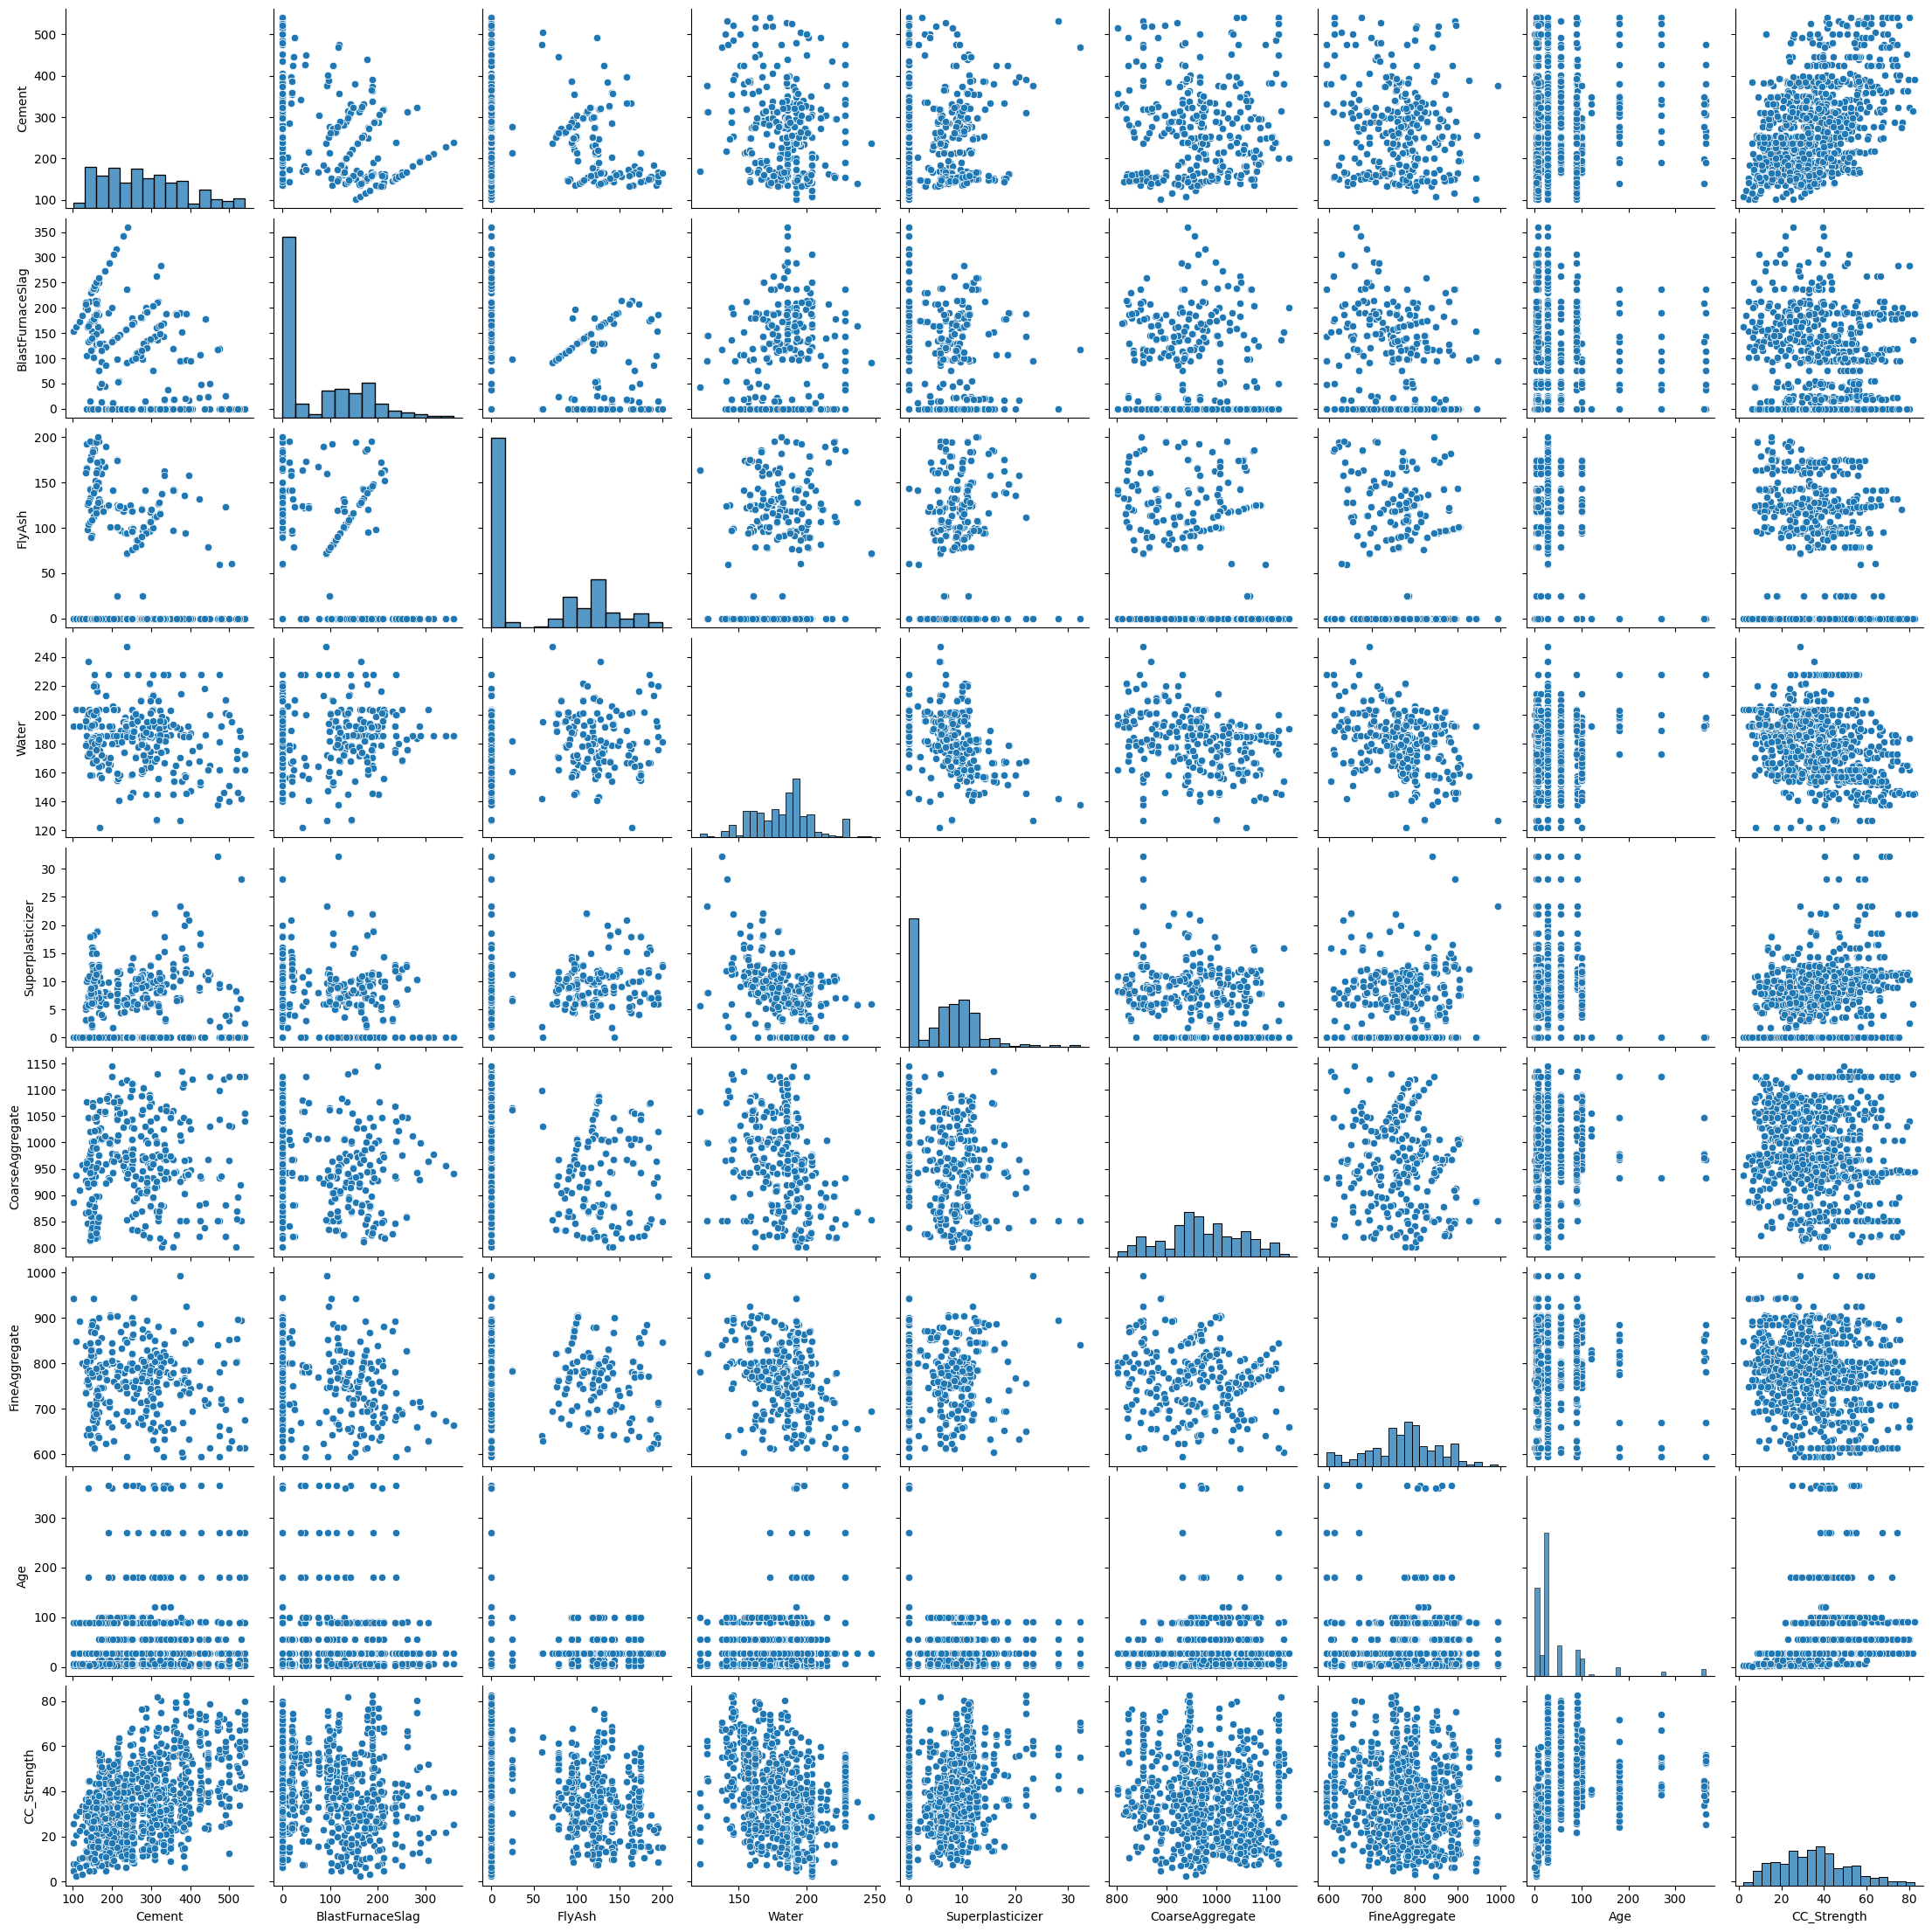

In [ ]:
sns.pairplot(data)
plt.show()

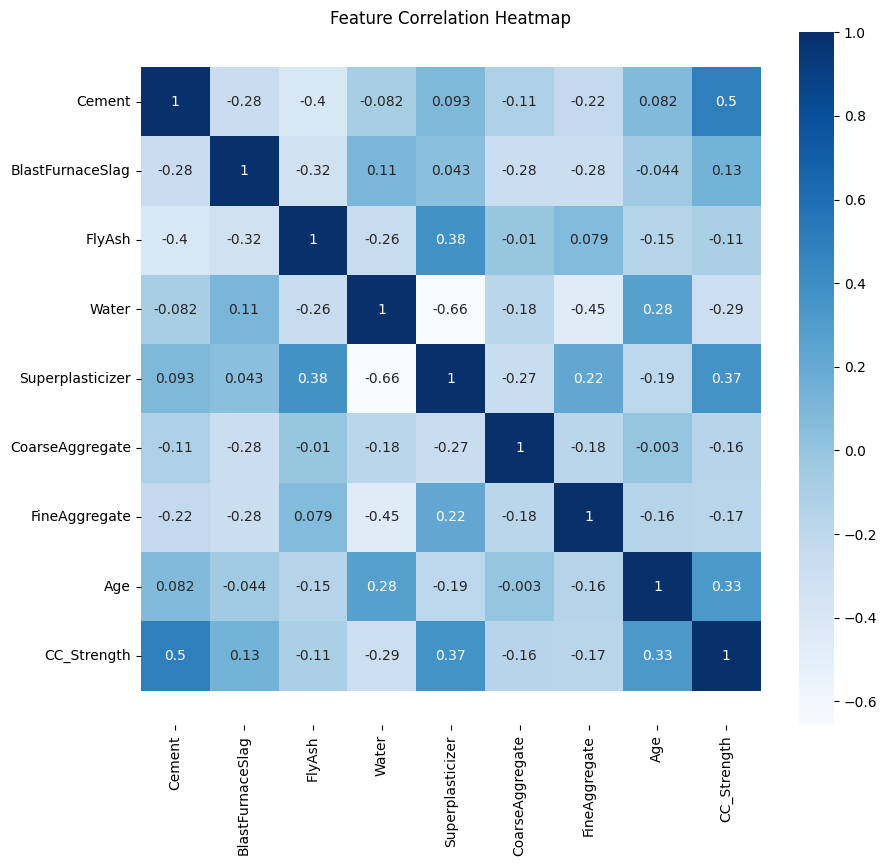

In [ ]:
corr = data.corr()

plt.figure(figsize= (10,9))
sns.heatmap(corr, annot = True, cmap = 'Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
data.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

Text(0.5, 1.0, 'Compressive Strength Distribution')

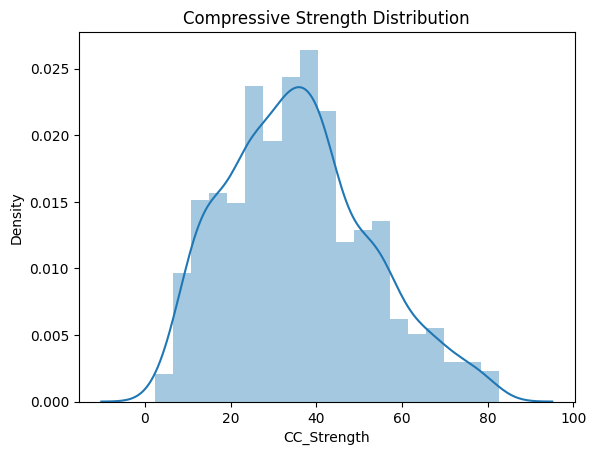

In [ ]:

ax = sns.distplot(data['CC_Strength'])
ax.set_title('Compressive Strength Distribution')

[0.00544297 0.016087   0.01886897 0.02189284 0.02370716 0.01354695
 0.01209549 0.00628966 0.00435438 0.00229814]

[0.04368932 0.12912621 0.15145631 0.17572816 0.19029126 0.10873786
 0.09708738 0.05048544 0.03495146 0.0184466 ]

[ 2.33180783 10.35854953 18.38529123 26.41203292 34.43877462 42.46551632
 50.49225801 58.51899971 66.54574141 74.5724831  82.5992248 ]


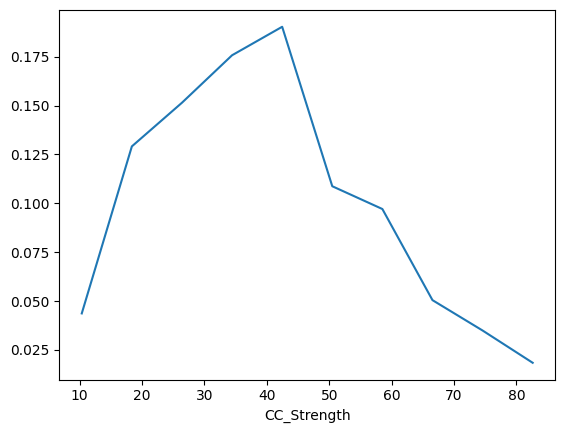

In [ ]:
counts,bin_edges = np.histogram(data['CC_Strength'],bins = 10, density = True)
print(counts)
print('')
plt.xlabel('CC_Strength')
pdf = counts/sum(counts)
print(pdf)
print('')
print(bin_edges)
plt.plot(bin_edges[1:],pdf)

[0.04368932 0.17281553 0.32427184 0.5        0.69029126 0.79902913
 0.8961165  0.94660194 0.9815534  1.        ]


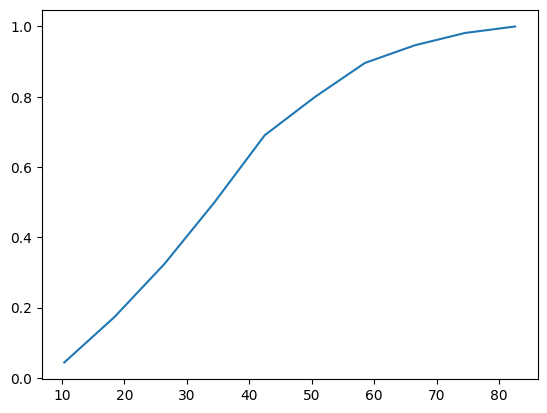

In [ ]:
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],cdf)

[0.00544297 0.016087   0.01886897 0.02189284 0.02370716 0.01354695
 0.01209549 0.00628966 0.00435438 0.00229814]
pdf
[0.04368932 0.12912621 0.15145631 0.17572816 0.19029126 0.10873786
 0.09708738 0.05048544 0.03495146 0.0184466 ]
bin_edges
[ 2.33180783 10.35854953 18.38529123 26.41203292 34.43877462 42.46551632
 50.49225801 58.51899971 66.54574141 74.5724831  82.5992248 ]
cdf
[0.04368932 0.17281553 0.32427184 0.5        0.69029126 0.79902913
 0.8961165  0.94660194 0.9815534  1.        ]


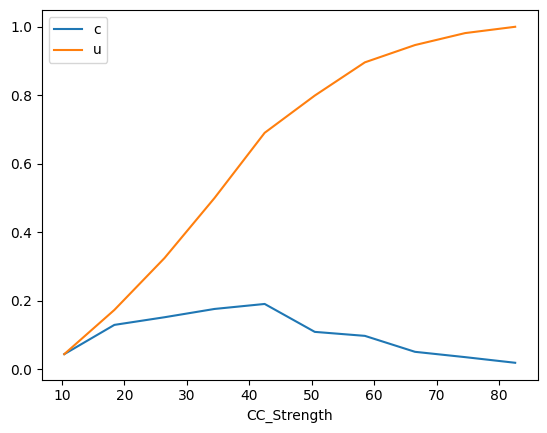

In [ ]:
counts,bin_edges = np.histogram(data['CC_Strength'],bins = 10, density = True)
print(counts)
print('pdf')
plt.xlabel('CC_Strength')
pdf = counts/sum(counts)
print(pdf)
print('bin_edges')
print(bin_edges)
cdf = np.cumsum(pdf)
print('cdf')
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('cumulative distribution function')

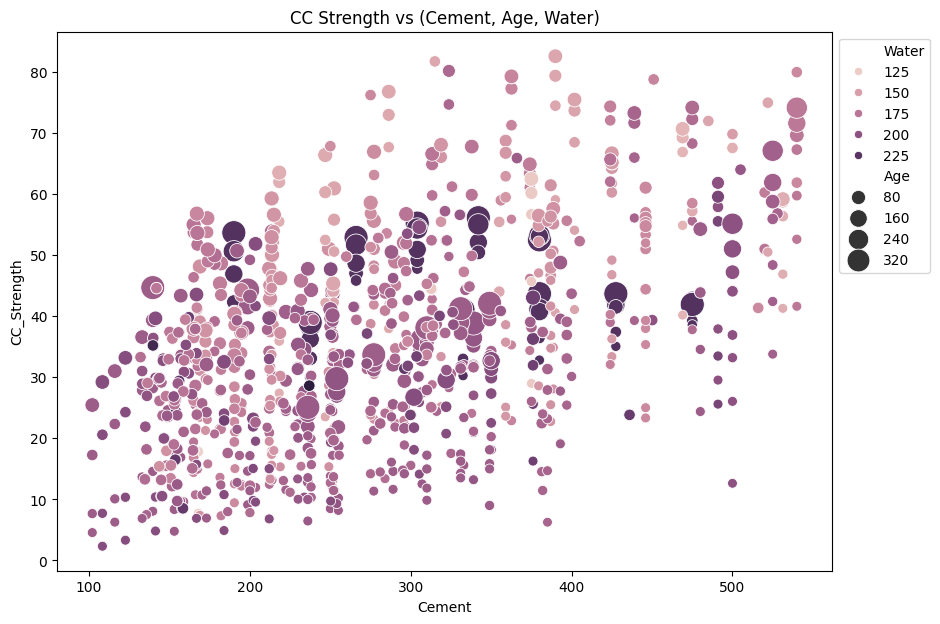

In [ ]:
fig,ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y='CC_Strength',x='Cement',hue="Water", size="Age",data=data,ax=ax,sizes= (50,300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

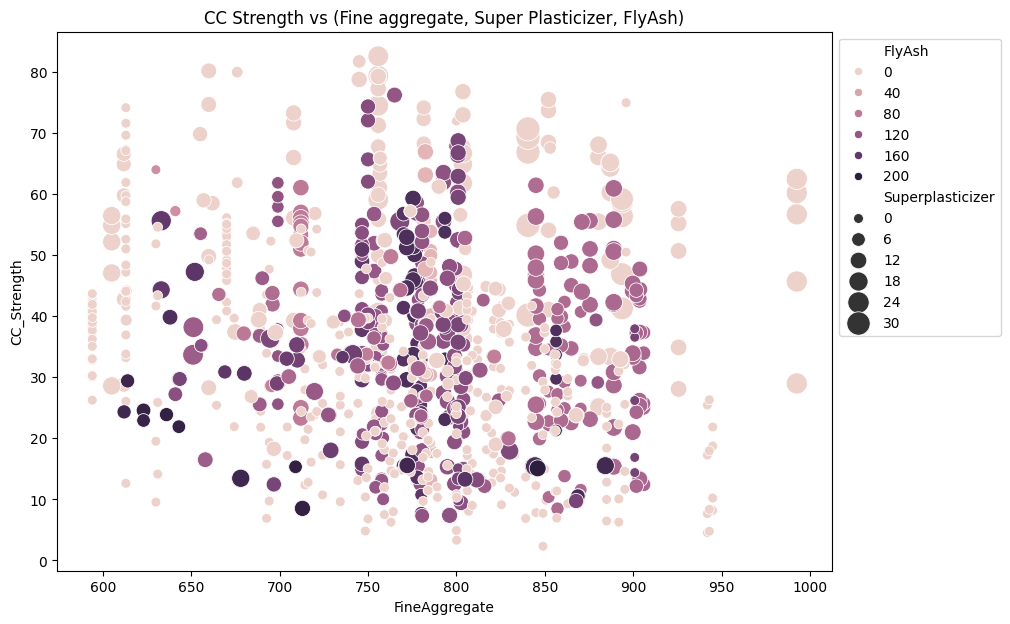

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="FlyAsh", size="Superplasticizer", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

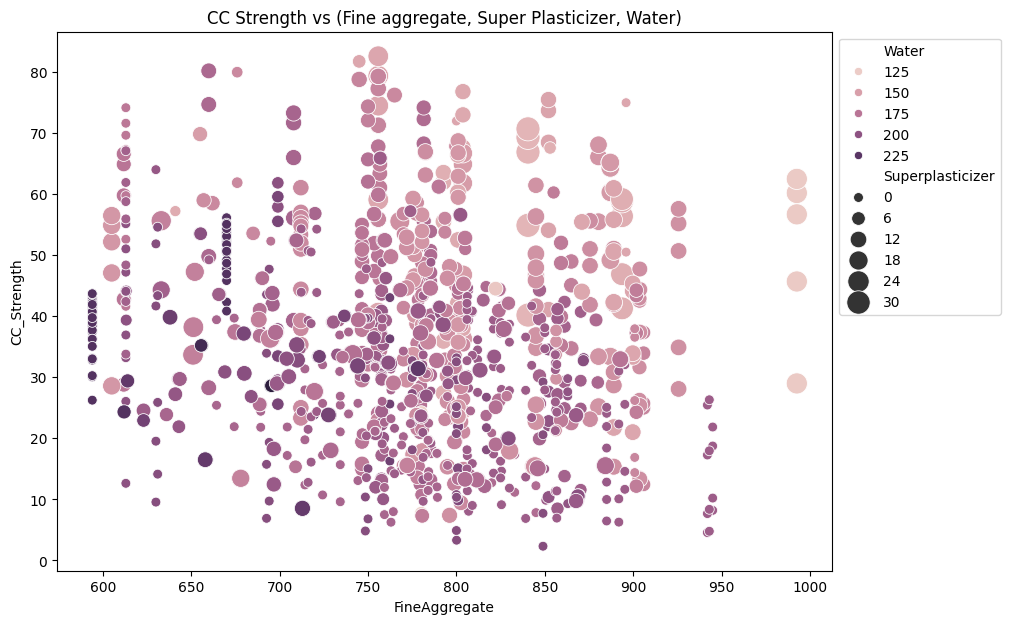

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="Water", size="Superplasticizer", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

In [ ]:
X = data.iloc[:,:-1]
# Features - All columns but last
y = data.iloc[:,-1]
# Target - Last Column

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
lr = LinearRegression()
# Linear Regression

lasso = Lasso()
# Lasso Regression

ridge = Ridge()
# Ridge Regression


In [ ]:
lr.fit(x_train, y_train)
# fitting the linear regression model

LinearRegression()

In [ ]:
lasso.fit(x_train, y_train)
# fitting lasso regression model

Lasso()

In [ ]:
ridge.fit(x_train, y_train)
# fitting the ridge regression model

Ridge()

In [ ]:
y_pred_lr = lr.predict(x_test)
# predicting the test with linear regression model


In [ ]:
y_pred_lasso = lasso.predict(x_test)
# predicting the test with lasso regression model

In [ ]:
y_pred_ridge = ridge.predict(x_test)
# predicting the test with ridge regression model

In [ ]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))


Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57


In [ ]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LassoRegression 	 10.68 		 114.13 	8.66 		0.54


In [ ]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57


In [ ]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")

print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))

print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.68 		 114.13 	8.66 		0.54
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57


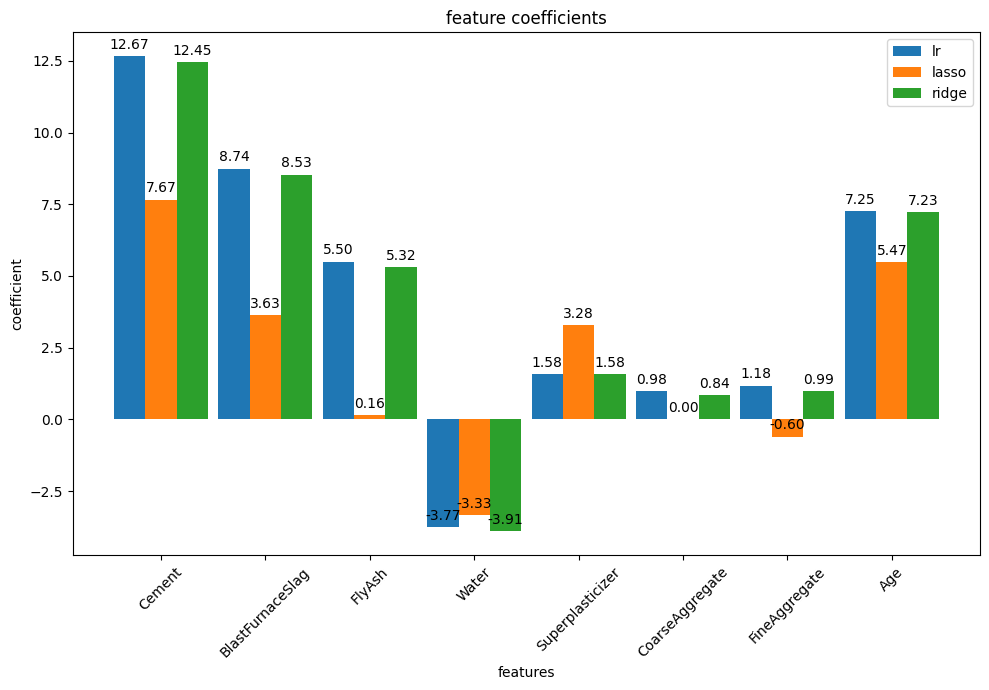

In [ ]:
coeff_lr = lr.coef_
#linear regression coefficients
coeff_lasso = lasso.coef_
#lasso regression coefficients
coeff_ridge = ridge.coef_
#ridge regression coefficients

labels = req_col_names[:-1]

x = np.arange(len(labels))
width = 0.3

fig,ax = plt.subplots(figsize = (10,7))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label = 'lr')
rects2 = ax.bar(x, coeff_lasso, width, label = 'lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label = 'ridge')

ax.set_ylabel('coefficient')
ax.set_xlabel('features')
ax.set_title('feature coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 45)
ax.legend()

def autolabel(rects):
  """Attach a text label above each bar in *rects*, displaying its height."""
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height), xy = (rect.get_x() + rect.get_width() / 2, height),
                 xytext = (0, 3), textcoords = 'offset points', ha = 'center', va = 'bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

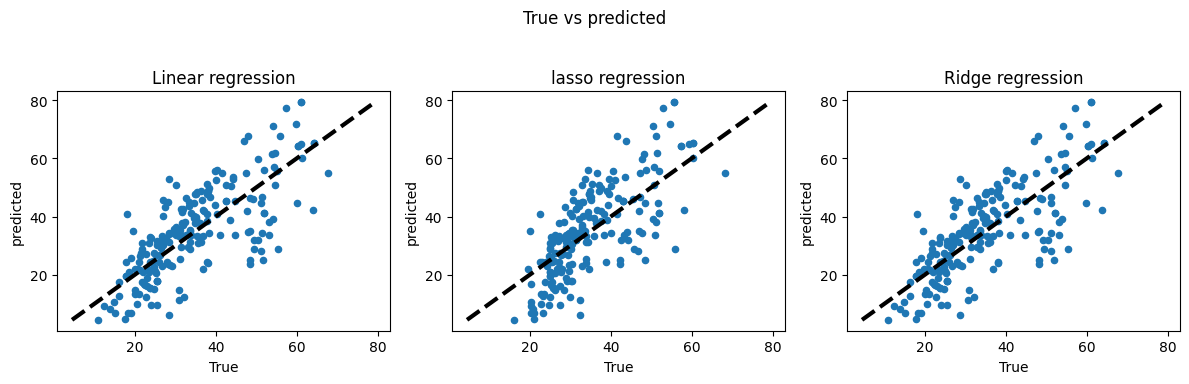

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 3)
ax1.set_xlabel('True')
ax1.set_ylabel('predicted')
ax1.set_title('Linear regression')

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 3)
ax2.set_xlabel('True')
ax2.set_ylabel('predicted')
ax2.set_title('lasso regression')


ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 3)
ax3.set_xlabel('True')
ax3.set_ylabel('predicted')
ax3.set_title('Ridge regression')

fig.suptitle('True vs predicted')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])